# NLP: Word2Vec

**Word2vec** cosists of training a neural network to  store "most" of the important information in a fixed, smaller number of dimensions: **a vector encoding**.

* It detects similarities mathematically
* Creates vectors that are distributed numerical representations of word features
* Uses features such as the context of individual words
* It does so without human intervention
* Given enough data, usage and contexts, Word2vec can make highly accurate guesses about a word’s meaning.

### 1. Import the necessary packages

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec 
import numpy as np

### 2. Define the text to analyse

In [2]:
text = """Nobody knows for certain what the world will look like in the aftermath of the COVID-19 pandemic that
has claimed and upended so many lives. One thing that is certain is that the pandemic has already impacted 
the way people work, live, and assess their finances. As a company founded in the wake of the 2008 financial crisis,
we know market turbulence is an inevitable part of a long-term investment strategy. But we also understand that 
that doesn’t make ups and downs any easier, and the emotional wear and tear of COVID can make rocky markets all 
the more challenging to stomach. In the first report of a three-part series, Betterment examines how the COVID-19 
crisis has and will continue to impact investors through their financial security, spending habits, and reactions 
to the market turbulence. Over the course of the next few months, we’ll be continuing to measure ongoing reactions 
and sentiment shifts as investors adjust to a changing economic environment.
An online survey was conducted with a panel of potential respondents. The recruitment period was April 14 to April 16,
2020. A total of 5,005 respondents living in the United States, who are invested in the markets completed the survey.
The sample was provided by Market Cube, a research panel company. Panel respondents were invited to take the 
survey via an email invitation and were incentivized to participate via the panel’s established points program.
Has your income been directly impacted by COVID-19? COVID-19 has had an immediate impact on investors’ 
financial security and confidence. More than half (54%) of all respondents had their income directly impacted 
as a result of COVID-19 and three-quarters said they are at least somewhat more stressed due to COVID-19 when 
it comes to their financial position and outlook. Has your income been directly impacted by COVID-19?
A pie chart that demonstrates how income has been affected during the coronavirus. Over a third of investors 
(34%) indicated they did not come into the COVID-19 pandemic with a sufficient emergency fund (i.e. three to six 
months of expenses in savings built up). Betterment, and most financial advisors, recommend having at least three 
months of expenses saved in a fund.
Top income impacts of COVID-19 across all investors. A good deal of unease around the pandemic stems from the unknown,
and the inability to plan for or know what’s next. Most investors reported some form of increased uncertainty in 
their financial situation: more than half (52%) of respondents believe they’ll need to tap into their long-term 
savings in a year or less and 43% believe it will take six months or longer to recover financially from the financial 
impacts of the pandemic. As a direct result of COVID-19, 18% of respondents have stopped saving and 21% have 
withdrawn from their savings account to cover regular expenses. On the left-hand side, the statistic says "18% 
of respondents have stopped savings." One the right-hand side, the statistic says "21% have withdrawn from their 
savings." Pay cuts, furloughs, layoffs, and other income losses disproportionately impacted younger generations.
Two graphs showing the generational impact from covid-19, those who lost their jobs and those who took a pay cut 
as a result of COVID-19's financial impact. How do investors plan to spend their stimulus checks?
Investors who expected to receive a federal stimulus check indicated a variety of ways they planned to use that 
money:  27% planned to use their stimulus check to cover rent and/or utility bills, 28% planned to use it to pay 
off debt, and 41% planned to put their stimulus check into a safety net fund.
Traditionally, our advice is to put away any windfall into savings, like an emergency fund (after basic expenses 
and high-interest debt are covered), and 41% of investors did exactly that. But the purpose of the stimulus checks
was to relieve short-term financial pressures and stimulate the economy through spending. While helpful, a one-time
check is not enough to ease fears and create the “shot-in-the-arm” to the economy it’s intended to; the checks may 
not have reached their desired destination with the 41% of savers and 13% of other investors who stashed their cash 
for another day. In response to COVID-19’s impact on the market, 20% of investors surveyed report that they 
took money out of the market. When asked to select all the reasons they did so, investors were equally likely
to select “to cover bills/necessary payments” as they were to select “to keep money safe from further losses,”
showing these sell-offs are not primarily need-based, but also fear-based.
Have you taken money out of the market in the last few weeks (March to mid-April)?
A pie chart demonstrating how the majority of people have not taken money out of the market in the past few weeks.
When do you plan to reinvest the money you took out?
There are four percentages. On the upper left-hand side, it says "48th say they will only reivest when the
market either is fully corrected or begins to correct." The bottom left-hand statistic says "7% unsure/other,"
the upper right-hand side says "39% of those that pulled out will reinvest when they're financial secure again,"
and the last statistic says "6% have no plans to reinvest at all."
While we’re glad to see that the large majority of investors haven’t taken their money out of the market, we’d
still like to see that 20% be closer to 0% (the exception being pulling from an invested safety net fund). 
Historically, downturns tend to have a temporary impact on economies and markets. The average bear market period
lasted 1.4 years with an average cumulative loss of -41%, while the average bull market period lasted 9.1 years 
with an average cumulative return of 476%. Feeling some level of anxiety when the market drops is only natural, 
but investors who react by pulling money out of the market might be doing themselves a disservice in the long-run
by costing themselves gains by waiting for the market to recover.
“As a result of the pandemic and financial fallout, 26% of respondents said they will switch financial institutions,
or are not sure they will stay at their current institution.”
Nearly half (47%) of the investors we surveyed reported that they were also investing during the crash of 2008,
indicating that they are now investing through their second “once-in-a-lifetime” global financial crisis.
With that, we took a look at how investors who have been through a downturn reacted versus newer investors.
Six data points showing a comparison of investor behaviour between new investors and those who went through
the financial crisis."""

In [3]:
# Replaces escape character with space 
text = text.replace("\n", " ") 

### 3. Tokenize the text

In [4]:
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(text): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp) 

In [5]:
data[0]

['nobody',
 'knows',
 'for',
 'certain',
 'what',
 'the',
 'world',
 'will',
 'look',
 'like',
 'in',
 'the',
 'aftermath',
 'of',
 'the',
 'covid-19',
 'pandemic',
 'that',
 'has',
 'claimed',
 'and',
 'upended',
 'so',
 'many',
 'lives',
 '.']

### 3. Train the word2vec model

In [6]:
# size represents the size of the vector embedings that we will use
# window is the amount of words in the vicinity that well take into account
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5) 

### 4. Evaluate word differences according to our model

In [7]:
print("Cosine similarity between 'markets' " + 
               "and 'money': ", 
    model1.similarity('markets', 'money'))  

Cosine similarity between 'markets' and 'money':  0.0007011285


In [8]:
print("Cosine similarity between 'markets' " + 
               "and 'environment': ", 
    model1.similarity('markets', 'environment'))  

Cosine similarity between 'markets' and 'environment':  -0.124752864


### 5. Plotting the result of the model

#### 5.1 Extract the vectors created by our model

We can retrieve all of the vectors from a trained model as follows:

In [9]:
X = model1[model1.wv.vocab]

#### 5.2 Reduce the dimentionality to plot in a 2D space

To plot the results in a 2D graph we first neet to make a dimentionality reduction, since we are working with vectors of size 100 we need to reduce them to only two dimentions. We will use PCA for this task

In [13]:
from sklearn.decomposition import PCA
# we will need the plotting libraries as well
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [14]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#### 5.3 Plot the results

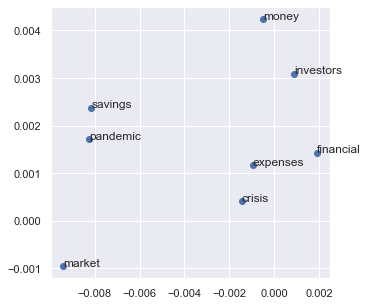

In [16]:
# Pick the words to plot
plt.figure(figsize=(5,5))
words = np.array(list(model1.wv.vocab))

idx = np.where(np.isin(words, ['market', 'investors', 'money', 'crisis', 'pandemic','financial',
                              'savings', 'expenses' ]))[0]

plt.scatter(result[idx, 0], result[idx, 1])

for i, word in zip(idx,words[idx]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))